# Predicting Apple Stock-Prices using Linear Regression

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics 
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
stocks = pd.read_csv('stock-prices.csv')
stocks.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [19]:
stocks['date'] = pd.to_datetime(stocks.date)
stocks.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [20]:
stocks.shape

(851264, 7)

## Apple Ticker 'AAPL'

In [25]:
apple = stocks[stocks.symbol == 'AAPL']
apple.head()

,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
721,2010-01-05,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0
1189,2010-01-06,AAPL,214.379993,210.969995,210.750004,215.230000,138040000.0
1657,2010-01-07,AAPL,211.750000,210.580000,209.050005,212.000006,119282800.0
2125,2010-01-08,AAPL,210.299994,211.980005,209.060005,212.000006,111902700.0


In [26]:
apple.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [27]:
apple.isna().any()

date      False
symbol    False
open      False
close     False
low       False
high      False
volume    False
dtype: bool

In [28]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 254 to 850767
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1762 non-null   datetime64[ns]
 1   symbol  1762 non-null   object        
 2   open    1762 non-null   float64       
 3   close   1762 non-null   float64       
 4   low     1762 non-null   float64       
 5   high    1762 non-null   float64       
 6   volume  1762 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 110.1+ KB


In [29]:
apple.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,313.076311,312.927066,309.828241,315.911288,9.422578e+07
std,185.299468,185.147104,183.383917,186.898177,6.020519e+07
min,90.000000,90.279999,89.470001,90.699997,1.147590e+07
25%,115.222498,115.190002,114.002500,116.362499,4.917478e+07
50%,318.230007,318.240008,316.545002,320.600008,8.050385e+07
75%,470.880017,472.592512,467.972513,478.110008,1.210816e+08
max,702.409988,702.100021,699.569977,705.070023,4.702495e+08


In [30]:
print(len(apple))

1762


<AxesSubplot:>

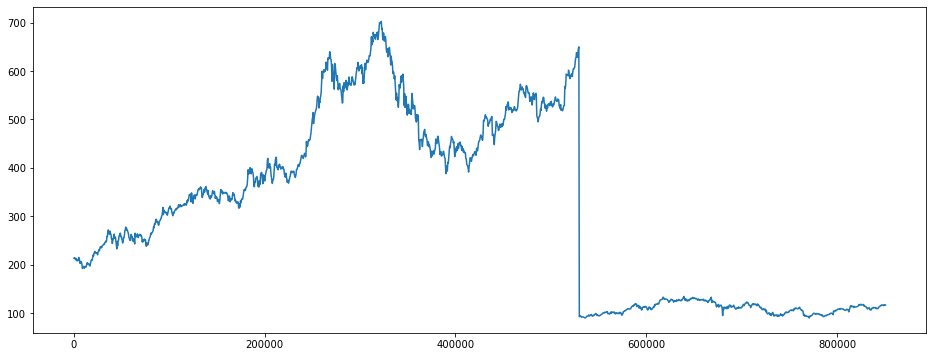

In [31]:
apple['open'].plot(figsize=(16,6))

In [34]:
X = apple[['open', 'high','low', 'volume']]
y = apple['close']

## Linear Regression 

In [35]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

In [36]:
X_train.shape

(1321, 4)

In [37]:
X_test.shape

(441, 4)

In [38]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [39]:
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
print(regressor)

LinearRegression()


In [43]:
print(regressor.coef_)

[-6.87191694e-01  8.53945360e-01  8.33346374e-01  2.12807902e-09]


In [44]:
print(regressor.intercept_)

-0.11819617099922652


In [46]:
predicted = regressor.predict(X_test)

In [47]:
print(X_test)

              open        high         low       volume
554866  100.440002  101.089996   99.949997   52699000.0
313912  679.989983  680.870003  673.540009  106752100.0
193592  364.509998  364.879993  355.089996  133828800.0
262212  602.739990  609.650002  601.410027  161010500.0
642920  124.769997  126.080002  124.019997   43940900.0
...            ...         ...         ...          ...
435361  491.999992  492.949974  486.500000   68074300.0
45198   232.819988  244.499989  231.349995  305972800.0
361577  460.000008  465.730019  450.249985  365213100.0
83656   277.689987  277.960007  273.679989  158619300.0
50826   251.470001  251.899998  242.490009  213657500.0

[441 rows x 4 columns]


In [48]:
predicted.shape

(441,)

In [50]:
dframe = pd.DataFrame(y_test, predicted)

In [52]:
dfr = pd.DataFrame({'Actual':y_test, 'Predicted':predicted})

In [53]:
print(dfr)

            Actual   Predicted
554866  100.570000  100.590717
313912  675.679977  675.543416
193592  356.439987  357.178897
262212  602.499985  607.817188
642920  125.260002  125.251455
...            ...         ...
435361  487.220016  488.303717
45198   242.319992  242.125287
361577  450.499977  457.473002
83656   275.369987  274.825990
50826   243.200012  244.715392

[441 rows x 2 columns]


In [54]:
dfr.head(25)

,Actual,Predicted
554866,100.570000,100.590717
313912,675.679977,675.543416
193592,356.439987,357.178897
262212,602.499985,607.817188
642920,125.260002,125.251455
632546,125.599998,125.560162
513706,531.700020,529.849981
473526,549.019989,550.367597
813267,111.769997,112.422286
850767,115.820000,116.061547


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
regressor.score(X_test, y_test)

0.9998101787589837

In [59]:
import math

In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))

Mean Absolute Error: 1.3021311102172666


In [61]:
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, predicted))

Mean Squared Error: 6.502155251849076


In [62]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Root Mean Squared Error: 2.5499324014273546


In [64]:
graph = dfr.head(20)

<AxesSubplot:>

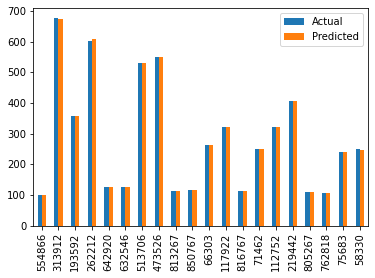

In [67]:
graph.plot(kind='bar')